In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

headers = ["Movie Title", "Opening Gross Sales ($ millions)", "Total Gross Sales ($ millions)", "Number of Theaters", "Weeks in Release"]

df_raw = pd.read_excel("Movies2016.xlsx", header=None, names=headers, skiprows=1)

print(df_raw)

                     Movie Title  Opening Gross Sales ($ millions)  \
0   Rogue One: A Star Wars Story                            155.08   
1                   Finding Dory                            135.06   
2     Captain America: Civil War                            179.14   
3        The Secret Life of Pets                            104.35   
4         The Jungle Book (2016)                            103.26   
..                           ...                               ...   
95                    The Forest                             12.74   
96                Ben-Hur (2016)                             11.20   
97                     The Witch                              8.80   
98          Bridget Jones's Baby                              8.57   
99         Kevin Hart: What Now?                             11.77   

    Total Gross Sales ($ millions)  Number of Theaters  Weeks in Release  
0                           532.18                4157                20  
1        

The describe() function does not use provide as much information as the excel descriptive statistics but it is enough to do complete other tasks.

In [3]:
desc_stats = df_raw.describe()

print(desc_stats)

       Opening Gross Sales ($ millions)  Total Gross Sales ($ millions)  \
count                        100.000000                       100.00000   
mean                          32.085000                       103.81900   
std                           36.348432                       105.53819   
min                            0.120000                        23.59000   
25%                           12.407500                        40.78250   
50%                           20.775000                        62.98500   
75%                           35.245000                       108.94750   
max                          179.140000                       532.18000   

       Number of Theaters  Weeks in Release  
count          100.000000        100.000000  
mean          3282.360000         14.730000  
std            668.290167          5.818561  
min           1213.000000          7.000000  
25%           2954.000000         11.000000  
50%           3285.000000         13.000000  
75

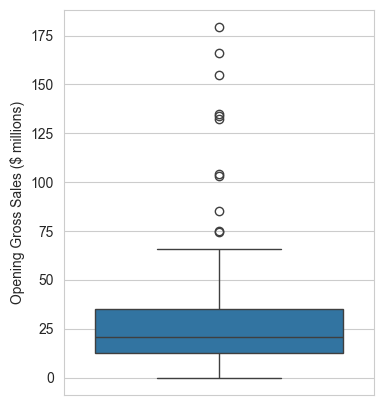

In [5]:
plt.figure(figsize=(4,5))
sns.boxplot(y="Opening Gross Sales ($ millions)", data=df_raw)
plt.show()

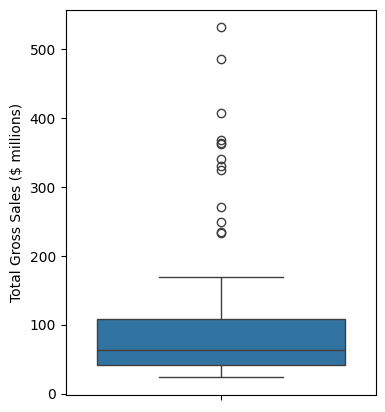

In [5]:
plt.figure(figsize=(4,5))
sns.boxplot(y="Total Gross Sales ($ millions)", data=df_raw)
plt.show()

In [6]:
iq_range = df_raw['Opening Gross Sales ($ millions)'].describe()['75%']-df_raw['Opening Gross Sales ($ millions)'].describe()['25%']
print(f"The interquartile range is {iq_range}")

print("The upper limit using IQR is ", end="")
print(df_raw['Opening Gross Sales ($ millions)'].describe()['75%']+ 1.5 * iq_range)

print("The lower limit using IQR is ", end="")
print(df_raw['Opening Gross Sales ($ millions)'].describe()['25%'] - 1.5 * iq_range)

The interquartile range is 22.837500000000006
The upper limit using IQR is 69.50125000000001
The lower limit using IQR is -21.84875000000001


In [9]:
print("The upper limit using empirical rule is ", end="")
print(df_raw['Opening Gross Sales ($ millions)'].describe()['mean'] + 3*df_raw['Opening Gross Sales ($ millions)'].describe()['std'])

print("The lower limit using empirical rule is ", end="")
print(df_raw['Opening Gross Sales ($ millions)'].describe()['mean'] - 3*df_raw['Opening Gross Sales ($ millions)'].describe()['std'])

The upper limit using empirical rule is 141.13029721842454
The lower limit using empirical rule is -76.96029721842453


In [10]:
iq_range2 = df_raw['Total Gross Sales ($ millions)'].describe()['75%']-df_raw['Total Gross Sales ($ millions)'].describe()['25%']
print(f"The interquartile range is {iq_range2}")

print("The upper limit using IQR is ", end="")
print(df_raw['Total Gross Sales ($ millions)'].describe()['75%']+ 1.5*iq_range2)

print("The lower limit using IQR is ", end="")
print(df_raw['Total Gross Sales ($ millions)'].describe()['25%'] - 1.5*iq_range2)

The interquartile range is 68.165
The upper limit using IQR is 211.195
The lower limit using IQR is -61.465


In [11]:
print("The upper limit using empirical rule is ", end="")
print(df_raw['Total Gross Sales ($ millions)'].describe()['mean'] + 3 *
      df_raw['Total Gross Sales ($ millions)'].describe()['std'])

print("The lower limit using empirical rule is ", end="")
print(df_raw['Total Gross Sales ($ millions)'].describe()['mean'] - 3 *
      df_raw['Total Gross Sales ($ millions)'].describe()['std'])

The upper limit using empirical rule is 420.43357089022294
The lower limit using empirical rule is -212.7955708902229


In [7]:
select_columns = ['Opening Gross Sales ($ millions)', 'Total Gross Sales ($ millions)', "Number of Theaters", "Weeks in Release"]
df_raw[select_columns].corr()

,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
Opening Gross Sales ($ millions),1.000000,0.917759,0.630005,0.261090
Total Gross Sales ($ millions),0.917759,1.000000,0.613431,0.473617
Number of Theaters,0.630005,0.613431,1.000000,0.175711
Weeks in Release,0.261090,0.473617,0.175711,1.000000


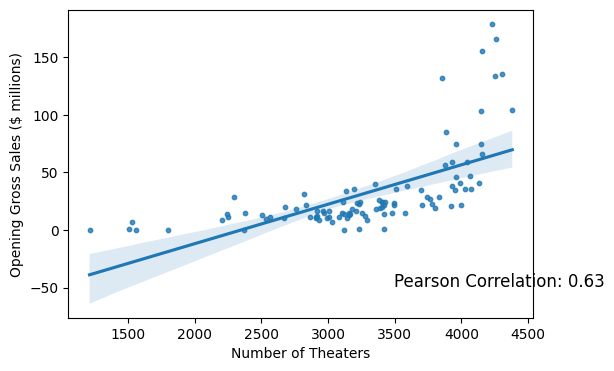

In [133]:
plt.figure(figsize=(6,4))
sns.regplot(x='Number of Theaters', y='Opening Gross Sales ($ millions)', data=df_raw, scatter_kws={'s': 10})
corr_coefficient = df_raw['Number of Theaters'].corr(df_raw['Opening Gross Sales ($ millions)'])
plt.annotate(f"Pearson Correlation: {corr_coefficient:.2f}", xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
plt.show()

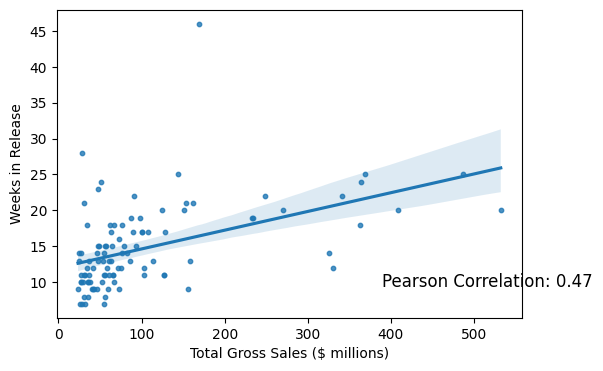

In [132]:
plt.figure(figsize=(6,4))
sns.regplot(x='Total Gross Sales ($ millions)', y='Weeks in Release', data=df_raw, scatter_kws={'s': 10})
corr_coefficient = df_raw['Weeks in Release'].corr(df_raw['Total Gross Sales ($ millions)'])
plt.annotate(f"Pearson Correlation: {corr_coefficient:.2f}", xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
plt.show()